# Data visualitation Diabetes

### Who is Pima Indians ?

Người Pima (hay Akimel O'odham, còn được viết là Akimel O'otham, "Người Sông", trước đây gọi là Pima) là một nhóm người Mỹ bản địa sinh sống tại khu vực ngày nay là miền trung và miền nam Arizona. Phần lớn dân số của hai nhóm Akimel O'odham còn sót lại sống trong hai khu bảo tồn: Keli Akimel O'otham thuộc Cộng đồng Người da đỏ Sông Gila (GRIC) và On'k Akimel O'odham thuộc Cộng đồng Người da đỏ Pima-Maricopa Sông Salt (SRPMIC)." Wikipedia

Nội dung
Tập dữ liệu bao gồm một số biến dự đoán y tế và một biến mục tiêu là Outcome (Kết quả). Các cột như sau:

+ Pregnancies (Số lần mang thai):- Số lần đã mang thai.

+ Glucose (Đường huyết):- Nồng độ glucose trong huyết tương sau 2 giờ trong nghiệm pháp dung nạp glucose đường uống.

+ BloodPressure (Huyết áp):- Huyết áp tâm trương (mm Hg).

+ SkinThickness (Độ dày nếp gấp da):- Độ dày nếp gấp da ở cơ tam đầu (mm).

+ Insulin:- Nồng độ insulin trong huyết thanh sau 2 giờ (mu U/ml).

+ BMI (Chỉ số khối cơ thể):- Chỉ số khối cơ thể (cân nặng tính bằng kg / (chiều cao tính bằng m)²).

+ DiabetesPedigreeFunction (Hàm phả hệ tiểu đường):- Một hàm số ước tính nguy cơ mắc bệnh tiểu đường dựa trên lịch sử gia đình.

+ Age (Tuổi):- Tuổi tính theo năm.

+ Outcome (Kết quả):- Biến phân loại (0 hoặc 1). Trong tổng số 768 trường hợp, có 268 trường hợp là 1 (mắc bệnh), các trường hợp còn lại là 0 (không mắc bệnh).

## import các thư viện cần thiết

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

### Import dữ liệu

In [2]:

url = "https://raw.githubusercontent.com/Phtzone/SGU25_KPDL_Group/main/Lab03/1.2/pima-indians-diabetes/diabetes.csv"
df = pd.read_csv(url)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Trực quan hoá dữ liệu

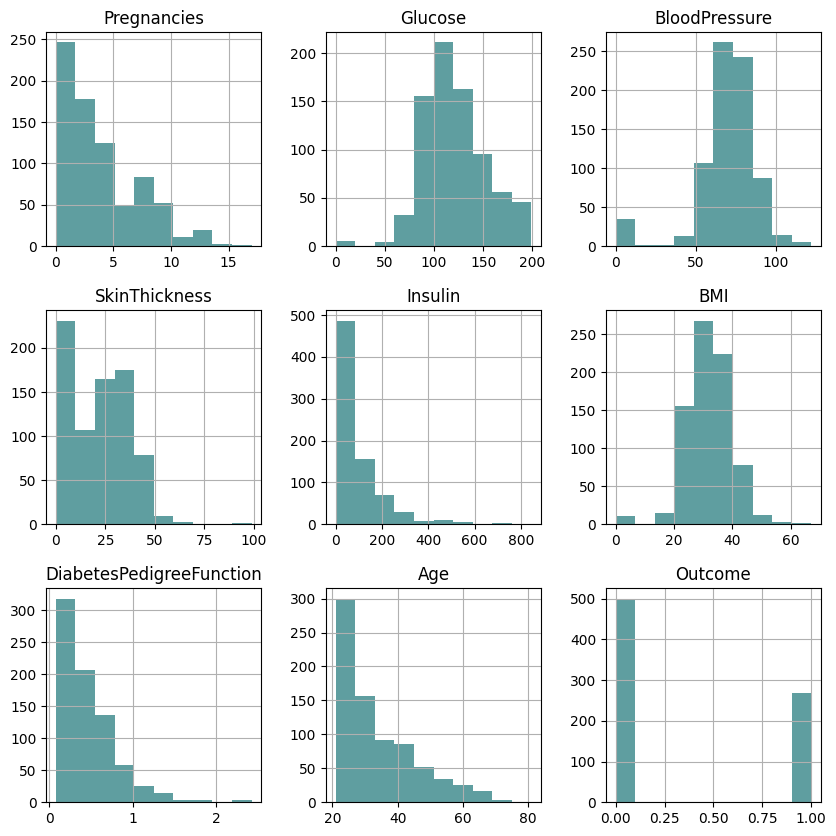

In [3]:
df.hist(figsize = (10,10), color = "#5F9EA0")
plt.show() 

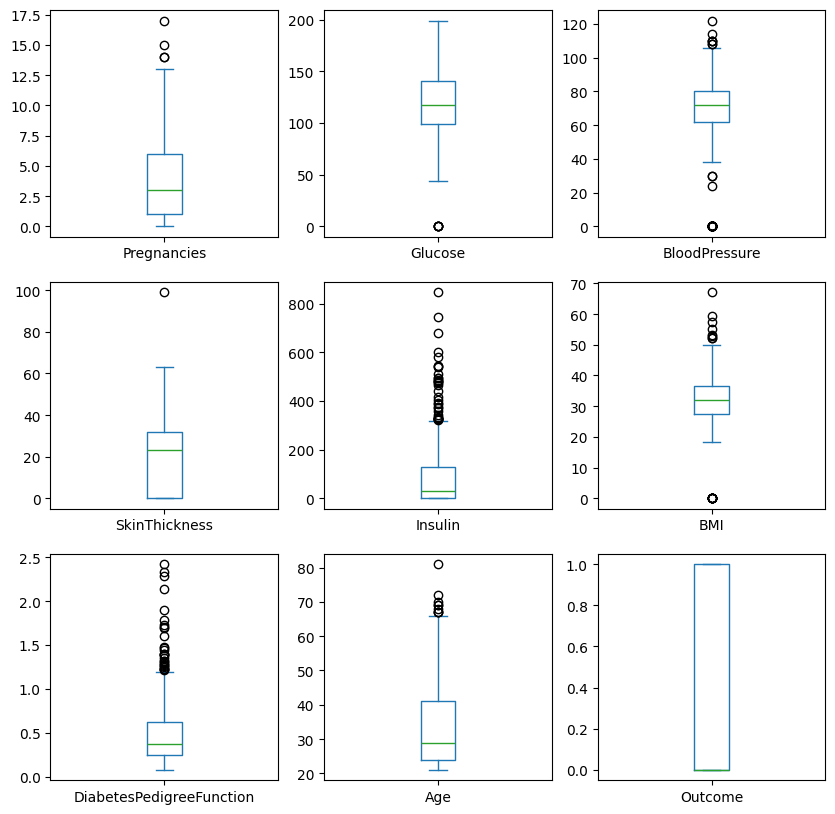

In [4]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()

### Phân bố biến mục tiêu

Phân bố của biến đầu ra:
Outcome
0    500
1    268
Name: count, dtype: int64
Tỷ lệ dương tính: 34.90%


/tmp/ipykernel_3418/1926490839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=df, palette=['skyblue', 'salmon'])


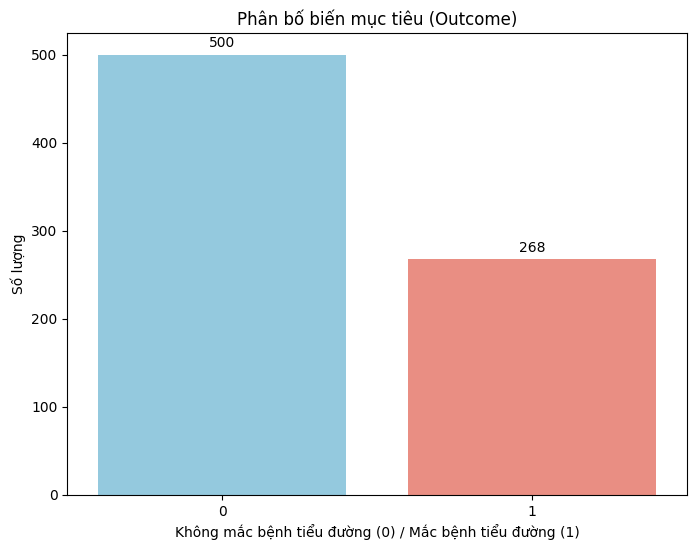

In [5]:
# Phân bố của biến đầu ra (Outcome)
outcome_counts = df['Outcome'].value_counts()
print("Phân bố của biến đầu ra:")
print(outcome_counts)
print(f"Tỷ lệ dương tính: {outcome_counts[1]/len(df):.2%}")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Outcome', data=df, palette=['skyblue', 'salmon'])
plt.title('Phân bố biến mục tiêu (Outcome)')
plt.xlabel('Không mắc bệnh tiểu đường (0) / Mắc bệnh tiểu đường (1)')
plt.ylabel('Số lượng')

# Thêm nhãn số lượng trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{int(height)}', 
            ha="center", va="bottom")
    
plt.show()


### Các đặc trưng tương quan lớn biến mục tiêu ( Outcome )

In [6]:
# Hiển thị các cặp đặc trưng có tương quan cao với Outcome
correlation_matrix = df.corr()
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Tương quan với Outcome:")
print(outcome_corr)# Hiển thị các cặp đặc trưng có tương quan cao với Outcome
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Tương quan với Outcome:")
print(outcome_corr)

Tương quan với Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
Tương quan với Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


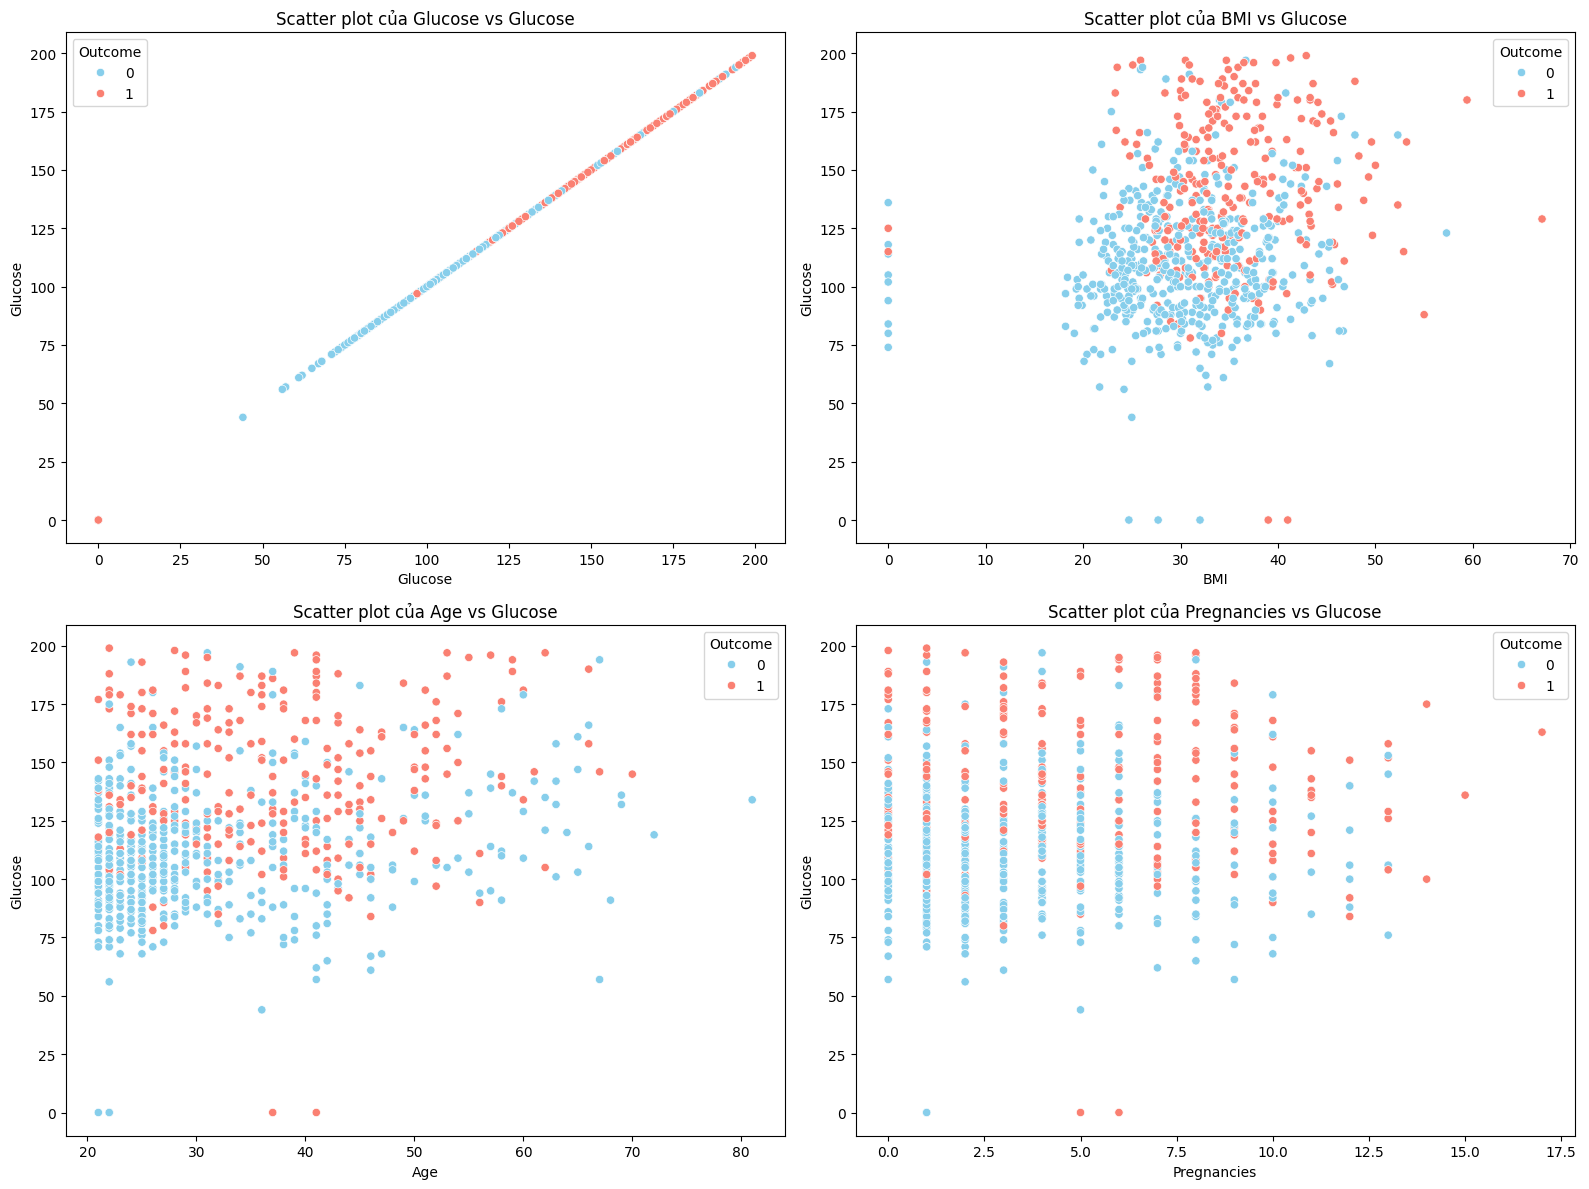

In [7]:
# Biểu đồ phân tán (scatter plot) cho các đặc trưng có tương quan cao với Outcome
plt.figure(figsize=(16, 12))
top_features = outcome_corr.index[1:5]  # Lấy 4 đặc trưng có tương quan cao nhất với Outcome (trừ bản thân Outcome)

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y='Glucose', hue='Outcome', data=df, palette=['skyblue', 'salmon'])
    plt.title(f'Scatter plot của {feature} vs Glucose')
plt.tight_layout()
plt.show()


### Mật độ (KDE) cho các đặc trưng quan trọng phân theo Outcome

/tmp/ipykernel_3418/1128032598.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Outcome'] == 0, col], label='Không mắc bệnh tiểu đường (0)', shade=True, color='skyblue')
/tmp/ipykernel_3418/1128032598.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Outcome'] == 1, col], label='Mắc bệnh tiểu đường (1)', shade=True, color='salmon')
/tmp/ipykernel_3418/1128032598.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Outcome'] == 0, col], label='Không mắc bệnh tiểu đường (0)', shade=True, color='skyblue')
/tmp/ipykernel_3418/1128032598.py:6: FutureWarning: 

`shade` is now deprecated in 

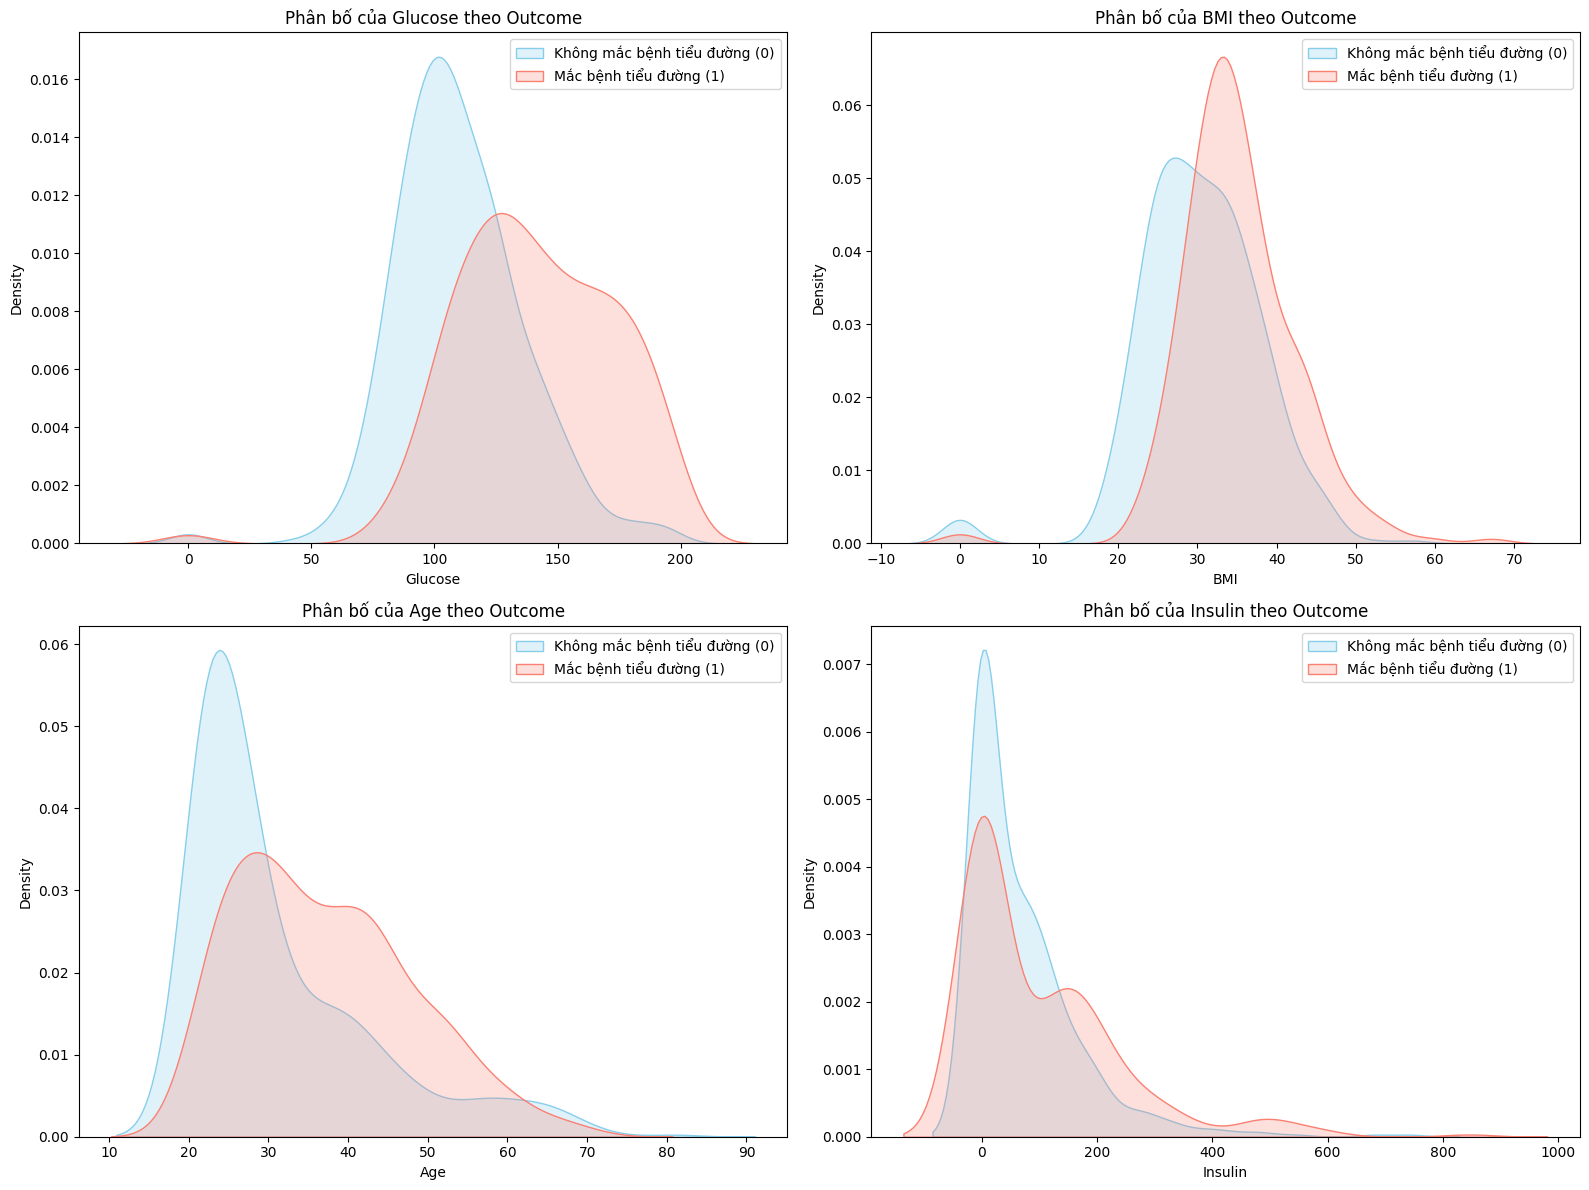

In [8]:
# Biểu đồ phân bố với mật độ (KDE) cho các đặc trưng quan trọng phân theo Outcome
plt.figure(figsize=(16, 12))
for i, col in enumerate(['Glucose', 'BMI', 'Age', 'Insulin']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.loc[df['Outcome'] == 0, col], label='Không mắc bệnh tiểu đường (0)', shade=True, color='skyblue')
    sns.kdeplot(df.loc[df['Outcome'] == 1, col], label='Mắc bệnh tiểu đường (1)', shade=True, color='salmon')
    plt.title(f'Phân bố của {col} theo Outcome')
    plt.legend()
plt.tight_layout()
plt.show()